# NLP

형태소분석 : 토큰분리, 어간추출, 품사부착, 색인, 벡터화

구문분석: 문장경계인식, 구문분석, 공기어, 개체명 사전 구축, 개체명 인식

의미분석: 대용어 해소, 의미 중의성 해결

담론분석: 분류, 군집, 중복, 요약, 가중치, 순위화, 토픽 모델링, 이슈 트래킹, 평판분석, 감성분석, 복합논증분석

## NLTK : Natural Language Tool Kit

In [19]:
import nltk

In [20]:
nltk.download('brown')
nltk.download('gutenberg')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\David\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\David\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

(비정형데이터)Input text - Sentence splitting - Tokenizing - Part_of_Speeach(POS) tagging

In [21]:
import sqlite3
con = sqlite3.connect("news.db")    #뉴스 기사 DB
cur = con.cursor()

In [22]:
cur.execute("""
    SELECT content
    FROM table2
    ORDER BY num ASC;
""")
corpus = [_[0] for _ in cur.fetchall()]

In [23]:
len(corpus)

35

In [24]:
from nltk.tokenize import sent_tokenize

nltk.download('punkt')    ## 구둣점

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\David\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
len(corpus[0]), len(corpus[0].split()), len(corpus[0].splitlines())

(3082, 692, 52)

In [26]:
from nltk.tokenize import sent_tokenize

len(sent_tokenize(corpus[0]))  # 실제 문장 수

39

In [27]:
corpus[0].splitlines()[0]  #제목

'일반고 전환 자사고 지원 방안 발표…5년간 20억 지원'

In [28]:
sent_tokenize(corpus[0])[0]  

'일반고 전환 자사고 지원 방안 발표…5년간 20억 지원\n"법령 개정해 자사고 법적근거 폐기해야…폐지 여부 공론화도"\n조희연 서울시교육감이 17일 서울 종로구 서울시교육청에서 열린 기자회견에서 일반고 종합 지원 계획을 발표하며 고개 숙여 인사하고 있다.'

In [29]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
sent_tokenize("Life is too short.")

['Life is too short.']

In [31]:
sent_tokenize("""
    Life is too short.... Life is too short !
    Life is too short    
""")

['\n    Life is too short.... Life is too short !', 'Life is too short']

In [32]:
sent_tokenize("""
    술 한잔 마셨습1니다... 영화가 잘 안되도 좋습니다. 하지만 엄복동 하나만
    기억해주세요 진심을 다해 전합니다. 영화가 별로 일수있습니다 
    밤낮으로 고민하고 연기 했습니다 ...최선을 다했고 열심히 했습니다 
    저의 진심이 느껴지길 바랍니다 고맙습니다...
""")

['\n    술 한잔 마셨습1니다... 영화가 잘 안되도 좋습니다.',
 '하지만 엄복동 하나만\n    기억해주세요 진심을 다해 전합니다.',
 '영화가 별로 일수있습니다 \n    밤낮으로 고민하고 연기 했습니다 ...최선을 다했고 열심히 했습니다 \n    저의 진심이 느껴지길 바랍니다 고맙습니다...']

In [33]:
from nltk.tokenize import word_tokenize
word_tokenize("Life is too short, Life is too short.")

#단어 단위로 자른다. 구둣점 기반이라 '어절' 자르기 좋다.

['Life', 'is', 'too', 'short', ',', 'Life', 'is', 'too', 'short', '.']

In [34]:
word_tokenize("""
    술 한잔 마셨습1니다... 영화가 잘 안되도 좋습니다. 하지만 엄복동 하나만
    "기억"해주세요 진심을 다해 전합니다. 영화가 별로 일수있습니다 
    밤낮으로 고민하고 연기 했습니다 ...최선을 다했고 열심히 했습니다 
    저의 진심이 느껴지길 바랍니다 고맙습니다...
""")

['술',
 '한잔',
 '마셨습1니다',
 '...',
 '영화가',
 '잘',
 '안되도',
 '좋습니다',
 '.',
 '하지만',
 '엄복동',
 '하나만',
 '``',
 '기억',
 "''",
 '해주세요',
 '진심을',
 '다해',
 '전합니다',
 '.',
 '영화가',
 '별로',
 '일수있습니다',
 '밤낮으로',
 '고민하고',
 '연기',
 '했습니다',
 '...',
 '최선을',
 '다했고',
 '열심히',
 '했습니다',
 '저의',
 '진심이',
 '느껴지길',
 '바랍니다',
 '고맙습니다',
 '...']

In [35]:
from nltk.tokenize import TweetTokenizer
word_tokenize("You need Python")

['You', 'need', 'Python']

In [36]:
import re
from nltk.tokenize import regexp_tokenize
pattern = re.compile(r"\b(\w+)\b")
regexp_tokenize("You need Python!!!! 12 한#$%^글", pattern)

['You', 'need', 'Python', '12', '한', '글']

In [37]:
pattern = re.compile(r"\b([가-힣])\b")
regexp_tokenize("You need Python!!!! 12 한#$%^글 ㅜㅠㅡㅠㅡ", pattern)

['한', '글']

In [38]:
print(re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣]","","ㅠㅠ ㅜㅜ ㅋㅋ 한@#$글"))

ㅠㅠㅜㅜㅋㅋ한글


In [48]:
import nltk

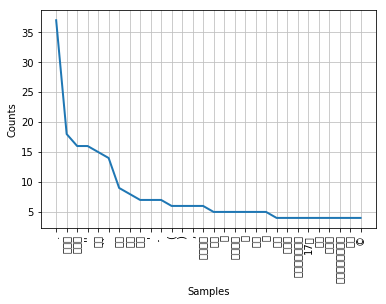

In [55]:
from nltk import Text
text = Text(word_tokenize(corpus[0]))

text.vocab().B()#unique한 토큰
text.vocab().N()#전체 토큰

text.vocab().most_common(30) # 가장 자주 쓰인 애들

text.plot(30)

In [57]:
text.vocab()

FreqDist({'.': 37, '일반고': 18, '자사고': 16, "''": 16, '지원': 15, '``': 14, '대한': 9, '종합': 8, '전환': 7, "'": 7, ...})

In [58]:
text.vocab().freq("정두언")

0.0

In [59]:
ratio = 0.0
for _ in [_[0] for _ in text.vocab().most_common(10)]:
    ratio += text.vocab().freq(_)
    print(text.vocab().freq(_))
print(ratio)

0.04528763769889841
0.022031823745410038
0.019583843329253364
0.019583843329253364
0.01835985312117503
0.017135862913096694
0.011015911872705019
0.009791921664626682
0.008567931456548347
0.008567931456548347
0.17992656058751527


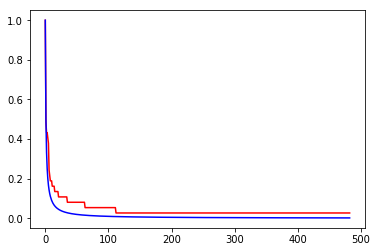

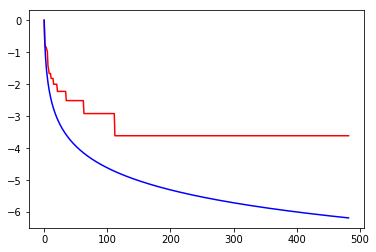

In [63]:
import matplotlib.pyplot as plt
from math import log
token = [_[0] for _ in sorted(text.vocab().items(), key=lambda x:x[1], reverse=True)]
freq = [_[1]/text.vocab().most_common(1)[0][1] for _ in sorted(text.vocab().items(), key=lambda x:x[1], reverse=True)]
_freq = [log(_) for _ in freq]
rank = [1/(_+1) for _ in range(len(token))]
_rank = [log(_) for _ in rank]

plt.plot([i for i in range(len(token))], freq, "r-")
plt.plot([i for i in range(len(token))], rank, "b-")
plt.show()

plt.plot([i for i in range(len(token))], _freq, "r-")
plt.plot([i for i in range(len(token))], _rank, "b-")
plt.show()

In [76]:
K = 10 #10 ~ 100
B = 0.4 #0.4 - 0.6

unique = list()
total = list()
heaps = list()
largeText = ""
for _ in corpus:
    largeText += _
    text = Text(largeText)
    unique.append(text.vocab().B())
    total.append(text.vocab().N())
    heaps.append(K*text.vocab().N()**B)

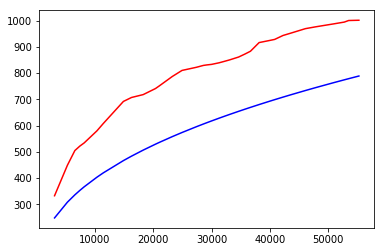

In [77]:
plt.plot(total, unique, "r-")
plt.plot(total, heaps, "b-")
plt.show()

In [ ]:
sentence = "Life is too short, You need Python"
N=2
Python?
P(Python|need,You,short,too,is,Life)
P(Python|need)
P(need|You)
N=3
P(Python|need,You)
P(need|You) P(Python|need
             )

In [87]:
sentence = "Life is too short, You need Python"

def eojeol(sentence, N=2):
    tokens = word_tokenize(sentence)
    ngram = list()
    for i in range(len(tokens)-(N-1)):
        #ngram.append(" ".join(tokens[i:i+N]))
        ngram.append(tuple(tokens[i:i+N]))
    return ngram

eojeol(sentence)

[('Life', 'is'),
 ('is', 'too'),
 ('too', 'short'),
 ('short', ','),
 (',', 'You'),
 ('You', 'need'),
 ('need', 'Python')]

In [88]:
eojeol(corpus[0])

[('일반고', '전환'),
 ('전환', '자사고'),
 ('자사고', '지원'),
 ('지원', '방안'),
 ('방안', '발표…5년간'),
 ('발표…5년간', '20억'),
 ('20억', '지원'),
 ('지원', "''"),
 ("''", '법령'),
 ('법령', '개정해'),
 ('개정해', '자사고'),
 ('자사고', '법적근거'),
 ('법적근거', '폐기해야…폐지'),
 ('폐기해야…폐지', '여부'),
 ('여부', '공론화도'),
 ('공론화도', "''"),
 ("''", '조희연'),
 ('조희연', '서울시교육감이'),
 ('서울시교육감이', '17일'),
 ('17일', '서울'),
 ('서울', '종로구'),
 ('종로구', '서울시교육청에서'),
 ('서울시교육청에서', '열린'),
 ('열린', '기자회견에서'),
 ('기자회견에서', '일반고'),
 ('일반고', '종합'),
 ('종합', '지원'),
 ('지원', '계획을'),
 ('계획을', '발표하며'),
 ('발표하며', '고개'),
 ('고개', '숙여'),
 ('숙여', '인사하고'),
 ('인사하고', '있다'),
 ('있다', '.'),
 ('.', '일반고'),
 ('일반고', '종합'),
 ('종합', '지원'),
 ('지원', '계획에는'),
 ('계획에는', '일반고'),
 ('일반고', '전환'),
 ('전환', '자사고에'),
 ('자사고에', '대한'),
 ('대한', '동방성장'),
 ('동방성장', '지원'),
 ('지원', '방안과'),
 ('방안과', '서열화된'),
 ('서열화된', '고교'),
 ('고교', '체계'),
 ('체계', '정상화를'),
 ('정상화를', '위한'),
 ('위한', '대책이'),
 ('대책이', '담겼다'),
 ('담겼다', '.'),
 ('.', '2019.7.17/뉴스1'),
 ('2019.7.17/뉴스1', '©'),
 ('©', 'News1'),
 ('News1', '오대일'),
 ('오대일', 

In [89]:
from collections import defaultdict

freq = defaultdict(int)
for _ in eojeol(corpus[0]):
    freq[_] += 1

In [90]:
sorted(freq.items().items(), key=lambda x:x[1], reverse=True)[:10]

AttributeError: 'dict_items' object has no attribute 'items'

In [91]:
freq['(', '서울=연합뉴스')']/sum(freq.values()) * freq[('서울=연합뉴스', ')')]/freq['(', '서울=연합뉴스']

SyntaxError: invalid syntax (<ipython-input-91-6a6b52f384a8>, line 1)

## Normalization

In [92]:
from nltk.corpus import stopwords
print(stopwords.open("english").read())

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\David/nltk_data'
    - 'C:\\Users\\David\\Anaconda3\\nltk_data'
    - 'C:\\Users\\David\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\David\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\David\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [93]:
ngram = defaultdict(int)
for token, freq in tokens.items():
    syllables = token.split()
    for i in range(len(syllables)-1):
        ngram[tuple(syllables[i:i+2])] += freq

NameError: name 'tokens' is not defined

In [95]:
maxKey = max(ngram, key=lambda x:x[1])
newTokens = dict()
for token, freq in tokens.itmes():
    newTokens[re.sub(" ".join(maxKey), "".join(maxKey), token)] = freq

ValueError: max() arg is an empty sequence

In [ ]:
tokens = newTokens
newTokens, maxKey

In [97]:
def mergeMaxkey(ngram, tokens):
    maxKey = max(ngram, key=ngram.get)
    maxValue = max(ngram.values())
    newTokens = dict()
    for token,freq in tokens.items():
        newTokens[re.sub(" ".join(maxKey), "".join(maxKey), token) if maxValue >= K else token] = freq
    print(maxKey)
    return newTokens

def findBigram(tokens):
    ngram = defaultdict(int)
    for token, freq in tokens.items():
        syllables = token.split()
        for i in range(len(syllables)-1):
            ngram[tuple(syllables[i:i+2])] += freq
    return ngram

tokens ={
    "l o w </w>" : 5,
    "l o w e s t </w>" : 2,
    "n e w e r </w>" : 6,
    "r i d e r </w>" : 3
    
}

tokens = {
    "아 버 지 가 </w>" : 5,
    "아 버 지 께 서 </w>" : 2,
    "아 버 지 를 </w>" : 6,
    "아 버 지 에 게 </w>" : 3,
}

K=max(tokens.values())
for _ in range(100):
    maxKey = findBigram(tokens)
    tokens = mergeMaxkey(maxKey, tokens, K)
    
pattern = r"[가-힣A-Za-z\/\<\>]{2,}"
result = list()
for _ in range(5):
    maxKey = findBigram(tokens)
    tokens = mergeMaxkey(maxKey, tokens)
tokens

TypeError: mergeMaxkey() takes 2 positional arguments but 3 were given